In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
response = requests.get("https://corgis-edu.github.io/corgis/csv/")
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
document.find_all("h3")

[<h3>Aids</h3>,
 <h3>Airlines</h3>,
 <h3>Billionaires</h3>,
 <h3>Broadway</h3>,
 <h3>Business Dynamics</h3>,
 <h3>Cancer</h3>,
 <h3>Cars</h3>,
 <h3>Classics</h3>,
 <h3>Construction Permits</h3>,
 <h3>Construction Spending</h3>,
 <h3>County Demographics</h3>,
 <h3>Covid</h3>,
 <h3>Drugs</h3>,
 <h3>Earthquakes</h3>,
 <h3>Election</h3>,
 <h3>Electricity</h3>,
 <h3>Emissions</h3>,
 <h3>Energy</h3>,
 <h3>Finance</h3>,
 <h3>Food</h3>,
 <h3>Food Access</h3>,
 <h3>Global Development</h3>,
 <h3>Graduates</h3>,
 <h3>Health</h3>,
 <h3>Hospitals</h3>,
 <h3>Hydropower</h3>,
 <h3>Ingredients</h3>,
 <h3>Injuries</h3>,
 <h3>Labor</h3>,
 <h3>Medal Of Honor</h3>,
 <h3>Music</h3>,
 <h3>Opioids</h3>,
 <h3>Police Shootings</h3>,
 <h3>Publishers</h3>,
 <h3>Real Estate</h3>,
 <h3>Retail Services</h3>,
 <h3>School Scores</h3>,
 <h3>Skyscrapers</h3>,
 <h3>Slavery</h3>,
 <h3>State Crime</h3>,
 <h3>State Demographics</h3>,
 <h3>State Fragility</h3>,
 <h3>Suicide Attacks</h3>,
 <h3>Supreme Court</h3>,
 <h3>Tate</

In [3]:
def pdcorgis(a):
    # step 1
    a = a.lower()
    # step 2
    website = "https://corgis-edu.github.io/corgis/csv/" + a + "/"
    response = requests.get(website)
    # step 3
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    elements = document.find_all("a")
    # step 4
    download_link = ""
    for i in elements:
        if i.has_attr("download"):
            download_link = i["href"]
    # step 5
    complete_download_link = website + download_link
    # step 6
    corgisdf = pd.read_csv(complete_download_link)
    return corgisdf

<AxesSubplot:xlabel='Time.Year'>

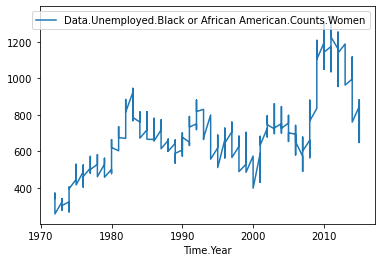

In [85]:
# line plot 1
df1 = pdcorgis("Labor")
df1.head()
df1.plot(x = "Time.Year", y = "Data.Unemployed.Black or African American.Counts.Women")

<AxesSubplot:title={'center':'Increase in Measles by Location'}, ylabel='loc'>

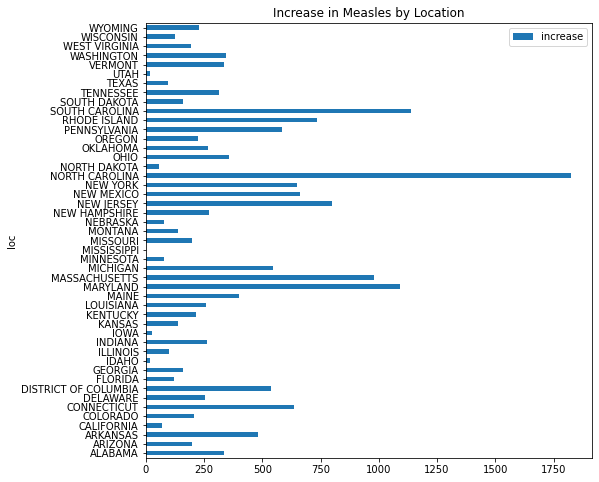

In [73]:
# bar plot 2
df2 = pdcorgis("Health")
df2.head()
df2[:47].plot(kind = "barh", x = "loc", y = "increase", figsize = (8, 8),
             title = "Increase in Measles by Location")

In [39]:
df2.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


<AxesSubplot:title={'center':'Artist Hottness in Music'}, ylabel='Frequency'>

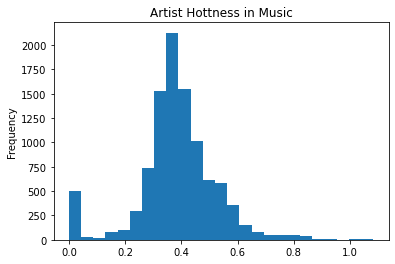

In [79]:
# histogram plot 3
df3 = pdcorgis("Music")
df3.head()
df3['artist.hotttnesss'].plot.hist(bins=25, title = "Artist Hottness in Music",
                                  xlabel = "Hottness rating")